## **LAB-5**


# 1. Clustering en Aprendizaje No Supervisado

## 1.1 Índice
- **1.1** Índice  
- **1.2** Importación de Librerías y Herramientas Básicas
- **1.3** (Aquí irá el siguiente tema que pase el usuario)

---

## 1.2 Importación de Librerías y Herramientas Básicas


### Librerías Importadas:

- **make_blobs**:
  - Pertenece a `scikit-learn`.
  - Genera datasets sintéticos con múltiples agrupaciones o **clusters**.
  - Facilita la evaluación de algoritmos de clustering como K-means, proporcionando datos controlados y personalizables.

- **NumPy**:
  - Biblioteca especializada en la manipulación de arrays y operaciones matemáticas.
  - Útil para gestionar los datos numéricos generados por `make_blobs` y realizar cálculos eficientes en el entorno Python.

- **Matplotlib**:
  - Herramienta de visualización de datos.
  - Permite representar los clusters generados mediante gráficos, lo cual es crucial para identificar agrupaciones visualmente y validar el comportamiento del algoritmo.
  

In [ ]:
# Importamos las librerías necesarias
from sklearn.datasets import make_blobs  # Genera datasets tipo "blobs"
import numpy as np  # Manipulación de arrays y operaciones matemáticas
import matplotlib.pyplot as plt  # Para la visualización de los datos

## 1.3 Variables Configurables

### Descripción General
Este bloque define las **variables configurables** que controlan los parámetros del dataset que se generará para los experimentos de clustering. Estas variables permiten ajustar el comportamiento del conjunto de datos de manera flexible para adaptarse a diferentes escenarios de análisis.

### Explicación de las Variables

- **N_CENTERS**:
  - Número de clusters que se generarán, seleccionado aleatoriamente entre **1 y 10**.
  - Controla cuántos grupos o agrupaciones tendrá el conjunto de datos.
  - Uso de `np.random.randint` garantiza que el valor cambie en cada ejecución, a menos que se use una semilla fija.

- **N_SAMPLES**:
  - Número total de **puntos de datos** o muestras que compondrán el dataset.
  - Un número más alto permite probar la escalabilidad del algoritmo de clustering.

- **COORDINATE_RANGE**:
  - Rango dentro del cual se generarán las **coordenadas de los centroides** de los clusters.  
  - En este caso, los centroides estarán dentro del intervalo **[-10, 10]** para ambas dimensiones (x, y).

- **MIN_DISTANCE**:
  - La **distancia mínima** que debe existir entre los centroides generados.
  - Garantiza que los clusters no se sobrepongan demasiado, facilitando una separación clara entre ellos.

- **STD_RANGE**:
  - Rango de **desviación estándar** para los puntos dentro de cada cluster, definido como **[0.4, 1.4]**.
  - Afecta la dispersión de los puntos alrededor del centroide: un valor menor indica un cluster más compacto, mientras que uno mayor indica una mayor dispersión.

- **RANDOM_STATE**:
  - Valor opcional utilizado como **semilla** para asegurar que los resultados sean reproducibles.
  - Si se fija este valor, cada vez que se ejecute el código, los datos generados serán idénticos, útil para depuración y comparaciones.

In [ ]:
# Número aleatorio de clusters entre 1 y 10
N_CENTERS = np.random.randint(1, 11)

# Número total de muestras (puntos)
N_SAMPLES = 10000

# Rango para las coordenadas de los centroides generados [-10, 10]
COORDINATE_RANGE = (-10, 10)

# Distancia mínima entre los centroides generados
MIN_DISTANCE = 7

# Rango de desviaciones estándar para cada cluster [0.1, 1.0]
STD_RANGE = (0.4, 1.4)

# Semilla para asegurar reproducibilidad (opcional)
RANDOM_STATE = 42

## 1.4 Funciones

### Explicación de la Función

- **`generate_blob_centers`**:
  - **Propósito**: Generar un conjunto de **centroides aleatorios** que estén lo suficientemente separados entre sí.
  - **Parámetros**:
    - `n_centers`: Número de centroides que se desean generar.
    - `min_dist`: Distancia mínima que debe existir entre cada centroide.
    - `coord_range`: Rango de coordenadas donde se generarán los centroides (por ejemplo, entre -10 y 10).
    - `random_state`: Semilla opcional para la reproducibilidad de los resultados.

### Lógica de la Función

1. **Inicialización del Generador Aleatorio**:
   - Se utiliza **`np.random.default_rng`** para crear un generador de números aleatorios, opcionalmente inicializado con una semilla (`random_state`).

2. **Bucle de Generación de Centroides**:
   - La lista `centers` almacena los centroides generados.
   - Mientras no se alcancen los **n_centers** deseados, se sigue generando candidatos.

3. **Generación de un Candidato**:
   - Cada candidato es un punto aleatorio dentro del rango definido por **`coord_range`**.
   - Esto asegura que los centroides estén distribuidos dentro del espacio especificado.

4. **Verificación de Distancia Mínima**:
   - Se verifica que el nuevo candidato esté **suficientemente separado** de los centroides ya generados.
   - La distancia entre puntos se calcula con **`np.linalg.norm`**, que mide la norma Euclidiana entre dos puntos.

5. **Agregado del Candidato**:
   - Si el candidato cumple con la condición de separación mínima, se añade a la lista de centroides.

6. **Conversión a Array de NumPy**:
   - Una vez completada la lista, se convierte en un **array de NumPy** para facilitar operaciones posteriores.

In [ ]:
def generate_blob_centers(n_centers, min_dist, coord_range, random_state=None):
    """
    Genera 'n_centers' centroides aleatorios separados por al menos 'min_dist'.
    """
    rng = np.random.default_rng(random_state)  # Inicializamos el generador aleatorio
    centers = []  # Lista vacía para los centroides

    while len(centers) < n_centers:  # Continuamos hasta tener la cantidad deseada
        # Genera un candidato dentro del rango especificado
        candidate = rng.uniform(coord_range[0], coord_range[1], size=2)

        # Verificamos que el candidato esté suficientemente separado de los demás
        if all(np.linalg.norm(candidate - np.array(c)) >= min_dist for c in centers):
            centers.append(candidate)  # Añadimos el candidato a la lista

    return np.array(centers)  # Convertimos la lista a un array de Numpy

## 1.5 Generación de Datos

### Explicación del Bloque

1. **Generación de Desviaciones Estándar**:
   - Se utiliza `np.random.uniform` para generar **valores aleatorios** dentro del rango especificado en **`STD_RANGE`** para cada cluster.
   - Cada cluster tiene una desviación estándar diferente, lo que hace que algunos clusters sean más compactos y otros más dispersos.

2. **Generación de los Centros de los Clusters**:
   - La función `generate_blob_centers` se usa para **crear los centroides** de los clusters.
   - Los centroides estarán separados por al menos la distancia definida en **`MIN_DISTANCE`** y dentro del rango de coordenadas **`COORDINATE_RANGE`**.

3. **Generación del Dataset**:
   - Se utiliza `make_blobs` de **`scikit-learn`** para generar el conjunto de datos.
   - Parámetros principales:
     - `n_samples`: Número total de puntos o muestras.
     - `centers`: Los centros de los clusters, generados previamente.
     - `cluster_std`: Desviación estándar específica para cada cluster.
     - `random_state`: Semilla utilizada para asegurar que los datos generados sean **reproducibles**.

4. **Impresión de Información**:
   - Se imprimen los **resultados generados** para verificar la cantidad de clusters, los centros y las desviaciones estándar correspondientes.

In [ ]:
# Generamos las desviaciones estándar aleatorias para cada cluster
blob_std = np.random.uniform(STD_RANGE[0], STD_RANGE[1], size=N_CENTERS)

# Generamos los centros de los clusters separados por MIN_DISTANCE unidades
blob_centers = generate_blob_centers(N_CENTERS, MIN_DISTANCE, COORDINATE_RANGE, RANDOM_STATE)

# Generamos el dataset con los parámetros configurados
X, y = make_blobs(
    n_samples=N_SAMPLES,  # Número de muestras
    centers=blob_centers,  # Centros de los clusters
    cluster_std=blob_std,  # Desviación estándar de cada cluster
    random_state=RANDOM_STATE  # Semilla para reproducibilidad
)

# Imprimimos la información generada para validar los resultados
print(f"Número de clusters generados: {N_CENTERS}")
print(f"Centros:\n{blob_centers}")
print(f"Desviaciones estándar por cluster:\n{blob_std}")

## 1.6 Visualización
### Explicación del Bloque

1. **Visualización de los Puntos del Dataset**:
   - Se utiliza `plt.scatter` para dibujar cada punto del dataset.
   - Parámetros:
     - **`X[:, 0]` y `X[:, 1]`**: Coordenadas de cada punto en los ejes X e Y.
     - **`c=y`**: Cada cluster recibe un color distinto, diferenciando los grupos.
     - **`cmap='viridis'`**: Colores extraídos del colormap `'viridis'` para una mejor diferenciación.
     - **`marker='o'` y `s=1`**: Cada punto se dibuja como un círculo pequeño.

2. **Dibujo de los Centros de los Clusters**:
   - Los centros de los clusters se destacan utilizando otro gráfico de dispersión con **marcadores rojos**.
   - Parámetros:
     - **`c='red'`**: Color rojo para diferenciar los centros.
     - **`marker='x'` y `s=100`**: Los centros se marcan con una 'x' de mayor tamaño.

3. **Título de la Gráfica**:
   - Se añade un título dinámico utilizando `plt.title`, que indica el **número de clusters generados**.

4. **Mostrar la Gráfica**:
   - Finalmente, se utiliza `plt.show()` para **visualizar el gráfico** en pantalla.


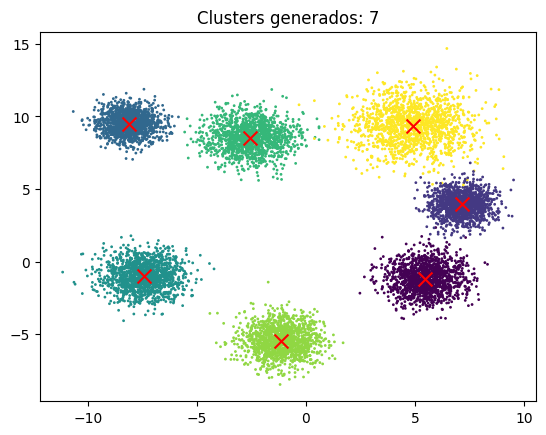

In [ ]:
# Dibujamos los puntos del dataset con un mapa de colores para diferenciar clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', s=1)

# Dibujamos los centros de los clusters en color rojo con una 'x'
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c='red', marker='x', s=100)

# Añadimos título indicando el número de clusters generados
plt.title(f"Clusters generados: {N_CENTERS}")

# Mostramos la gráfica
plt.show()

## 1.7 Clustering con K-means
### Explicación del Bloque

1. **Uso del Número de Clusters Generado**:
   - Se utiliza el valor de `N_CENTERS` como el número de clusters (`K`) para el modelo K-means.
   - Esto asegura que el número de clusters del dataset coincida con el número de clusters en el modelo.

2. **Creación del Modelo K-means**:
   - Se crea una instancia del modelo **KMeans**.
   - **Parámetros principales**:
     - `n_clusters`: Número de clusters que debe identificar el algoritmo.
     - `random_state`: Semilla para asegurar reproducibilidad.
     - `n_init=10`: Número de veces que se ejecutará el algoritmo con diferentes inicializaciones para encontrar la mejor solución.

3. **Ajuste del Modelo y Predicciones**:
   - El método `fit_predict`:
     - **Ajusta el modelo** a los datos (`X`).
     - **Asigna etiquetas** a cada punto, indicando a qué cluster pertenece.

4. **Impresión de las Etiquetas Generadas**:
   - Se imprimen las etiquetas asignadas por K-means para validar los resultados.


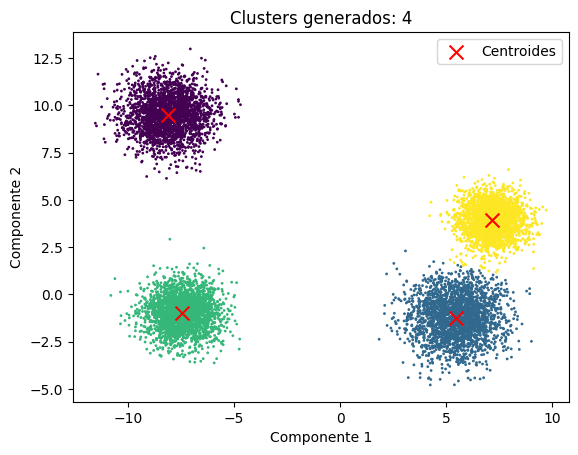

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parámetros
K = N_CENTERS  # Número de clusters
RANDOM_STATE = 42  # Semilla para reproducibilidad

# Creamos el modelo K-means
kmeans = KMeans(n_clusters=K, random_state=RANDOM_STATE)
#ajuste de los datos
kmeans.fit(X)

# Ajustamos el modelo y obtenemos las predicciones
y_pred = kmeans.fit_predict(X)

# Dibujamos los puntos del dataset con un mapa de colores para diferenciar clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', s=1)

# Dibujamos los centros de los clusters en color rojo con una 'x'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Centroides')

# Añadimos título indicando el número de clusters generados
plt.title(f"Clusters generados: {K}")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Añadimos leyenda
plt.legend()

# Mostramos la gráfica
plt.show()

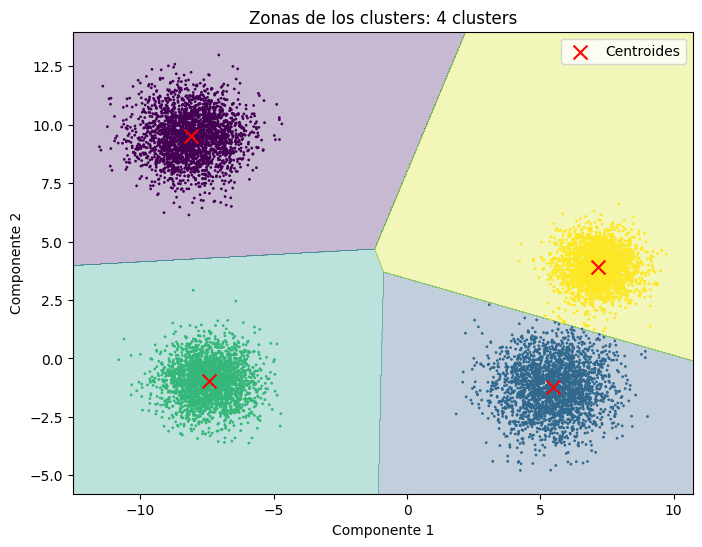

In [ ]:
# Crear una malla de puntos para trazar las fronteras
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

# Predecir los clusters para cada punto de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las fronteras de los clusters como contornos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Dibujar los puntos originales del dataset
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=1, marker='o')

# Dibujar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Centroides')

# Personalizar la gráfica
plt.title(f"Zonas de los clusters: {K} clusters")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
print(f"Número de clusters generados: {N_CENTERS}")

# Imprimimos la información calculados por K-means
print("Centroides de los clusters:")
print(f"Desviaciones estándar por cluster:\n{kmeans.cluster_centers_}")


# Imprimimos la información generada para validar los resultados
print("Centroides de los clusters Generados:")
print(f"Centros:\n{blob_centers}")

Número de clusters generados: 4
Centroides de los clusters:
Desviaciones estándar por cluster:
[[-8.09190514  9.50927993]
 [ 5.46983231 -1.23451177]
 [-7.43797716 -0.96318435]
 [ 7.15932311  3.92156991]]
Centroides de los clusters Generados:
Centros:
[[ 5.47912097 -1.2224312 ]
 [ 7.1719584   3.94736058]
 [-8.11645304  9.51244703]
 [-7.43772735 -0.99228124]]


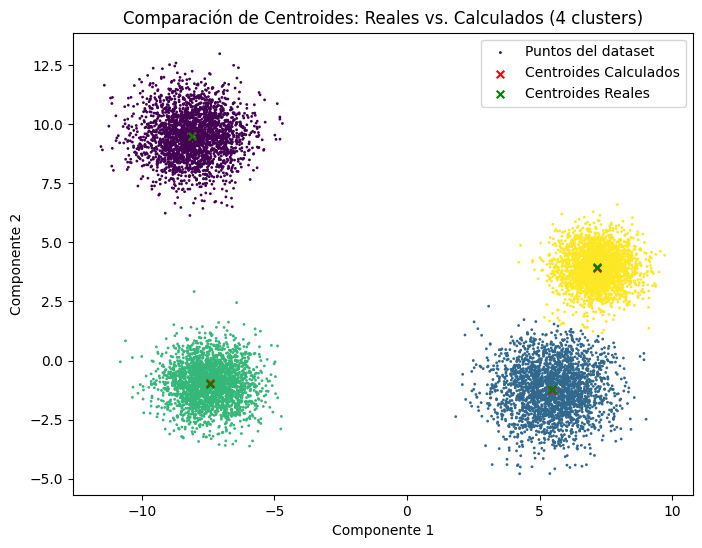

In [ ]:
# Graficar los puntos del dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=1, label='Puntos del dataset')

# Graficar los centroides calculados por K-means
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=30, label='Centroides Calculados')

# Graficar los centroides reales
plt.scatter(blob_centers[:, 0], blob_centers[:, 1],
            c='green', marker='x', s=30, label='Centroides Reales')

# Añadir título e información relevante
plt.title(f"Comparación de Centroides: Reales vs. Calculados ({K} clusters)")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()

# Mostrar la gráfica
plt.show()

Distancias a los centroides:
 [[11.03939373  6.35461501  8.00649522  7.41271464]
 [13.39476184  4.06966068 10.85042989  4.58174635]
 [ 8.2642739   9.46937956  5.9499976  10.20103608]
 [ 8.66357334  9.25659968  5.62932386 10.25829942]
 [ 9.65725548  8.05141432  9.98867788  6.76278654]]
Cluster asignado a cada punto nuevo: [1 1 2 2 3]


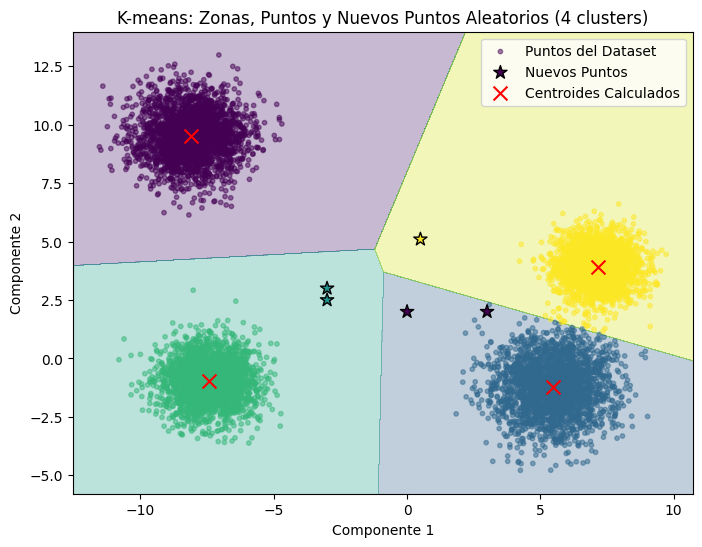

In [ ]:
# Generamos un conjunto de puntos aleatorios (X_new) dentro del rango del dataset original
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Crear malla de puntos para graficar las zonas
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

# Predecir los clusters para cada punto de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generamos 10 puntos aleatorios para X_new
X_new = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(10, 2))
# Generamos 10 puntos aleatorios para X_new
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5],[0.5, 5.1]])

# Usar kmeans.transform para calcular distancias a los centroides
distancias = kmeans.transform(X_new)
print("Distancias a los centroides:\n", distancias)

# Predecimos las clases de los puntos aleatorios usando la menor distancia
y_new_pred = np.argmin(distancias, axis=1)
print("Cluster asignado a cada punto nuevo:", y_new_pred)

# Visualización
plt.figure(figsize=(8, 6))

# Graficar las zonas de los clusters
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Graficar los puntos originales con los colores de sus clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10, marker='o', alpha=0.5, label='Puntos del Dataset')

# Graficar los nuevos puntos aleatorios con sus clusters asignados
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_pred, cmap='viridis', marker='*', s=100, edgecolors='black', label='Nuevos Puntos')

# Graficar los centroides calculados por K-means
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Centroides Calculados')

# Personalización de la gráfica
plt.title(f"K-means: Zonas, Puntos y Nuevos Puntos Aleatorios ({K} clusters)")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()

# Mostrar la gráfica
plt.show()

Explicación del Código Original
n_clusters=8:
Cada modelo busca dividir los datos en 8 clusters.

init="random":
Inicializa los centroides de forma aleatoria (otra opción común es "k-means++").

n_init=1:
Solo se hace una inicialización del modelo (por defecto, K-means realiza múltiples inicializaciones para evitar malos resultados).

algorithm="lloyd" y "elkan":

"lloyd": Es el algoritmo clásico de K-means, que itera buscando minimizar la varianza dentro de los clusters.
"elkan": Es una versión optimizada para acelerar el cálculo de distancias en datasets grandes.
max_iter:
Define cuántas iteraciones puede realizar el algoritmo antes de detenerse. En este caso, se realizan modelos con 1, 2, 3, y 4 iteraciones, y finalmente un modelo con hasta 2000 iteraciones.

In [ ]:
def plot_data(X):
    """Función para graficar los datos."""
    plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')

def plot_centroids(centroids, circle_color='r', cross_color='w'):
    """Función para graficar los centroides con círculos y cruces."""
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=80, linewidths=8, color=circle_color, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2, color=cross_color)

def plot_decision_boundaries(kmeans, X, show_centroids=True, show_xlabels=True, show_ylabels=True):
    """Función para graficar las fronteras de decisión."""
    # Crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de los clusters
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Graficar los puntos del dataset
    plot_data(X)

    # Graficar los centroides si es necesario
    if show_centroids:
        plot_centroids(kmeans.cluster_centers_)

    # Personalizar etiquetas de los ejes
    if not show_xlabels:
        plt.tick_params(labelbottom=False)
    if not show_ylabels:
        plt.tick_params(labelleft=False)

<ipython-input-20-85756d504bdd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')
<ipython-input-20-85756d504bdd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')
<ipython-input-20-85756d504bdd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')
<ipython-input-20-85756d504bdd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')
<ipython-input-20-85756d504bdd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.6, cmap='viridis')
<ipython-input-20-85756d504bdd>:3: UserWarning: No data

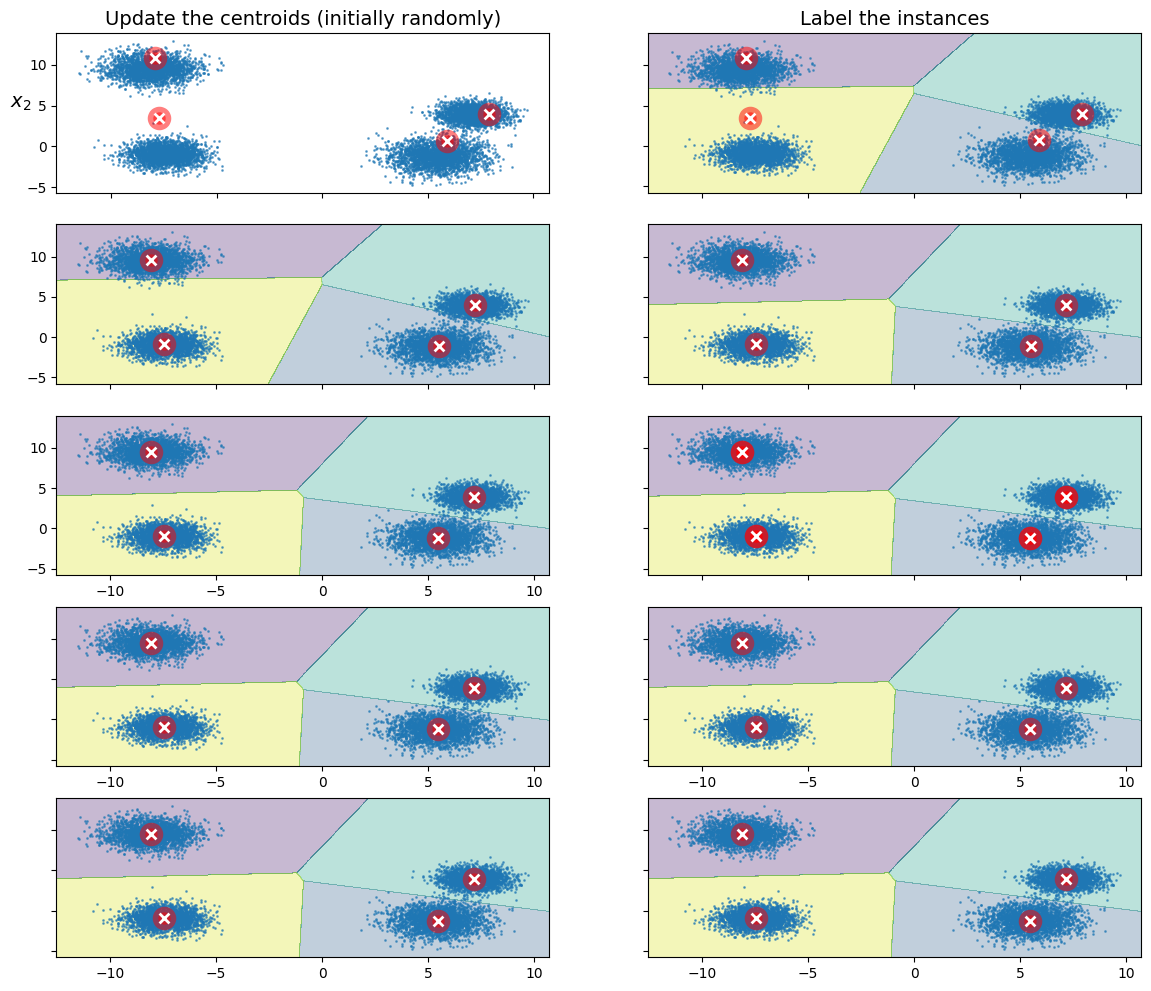

In [ ]:
from sklearn.cluster import KMeans

# Configuración del modelo K-means
N_CENTERS = K  # Número de clusters
RANDOM_STATE = 42

# Crear múltiples modelos de K-means con diferentes iteraciones
kmeans_iter1 = KMeans(n_clusters=N_CENTERS, init="random", n_init=1, algorithm="lloyd", max_iter=1, random_state=RANDOM_STATE)
kmeans_iter2 = KMeans(n_clusters=N_CENTERS, init="random", n_init=1, algorithm="lloyd", max_iter=2, random_state=RANDOM_STATE)
kmeans_iter3 = KMeans(n_clusters=N_CENTERS, init="random", n_init=1, algorithm="lloyd", max_iter=3, random_state=RANDOM_STATE)
kmeans_iter4 = KMeans(n_clusters=N_CENTERS, init="random", n_init=1, algorithm="lloyd", max_iter=4, random_state=RANDOM_STATE)
kmeans_iter5 = KMeans(n_clusters=N_CENTERS, init="random", algorithm="elkan", max_iter=2000, random_state=RANDOM_STATE)

# Ajustamos cada modelo al dataset
models = [kmeans_iter1, kmeans_iter2, kmeans_iter3, kmeans_iter4, kmeans_iter5]
for model in models:
    model.fit(X)

# Visualización de los diferentes pasos del algoritmo
plt.figure(figsize=(14, 12))  # Tamaño grande para acomodar 10 subgráficos

# Subgráficos para cada iteración
plt.subplot(521)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(522)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(523)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(524)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(525)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(526)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter4.cluster_centers_)

plt.subplot(527)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)

plt.subplot(528)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)

plt.subplot(529)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)

plt.subplot(5, 2, 10)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)

# Mostrar la gráfica final
plt.show()


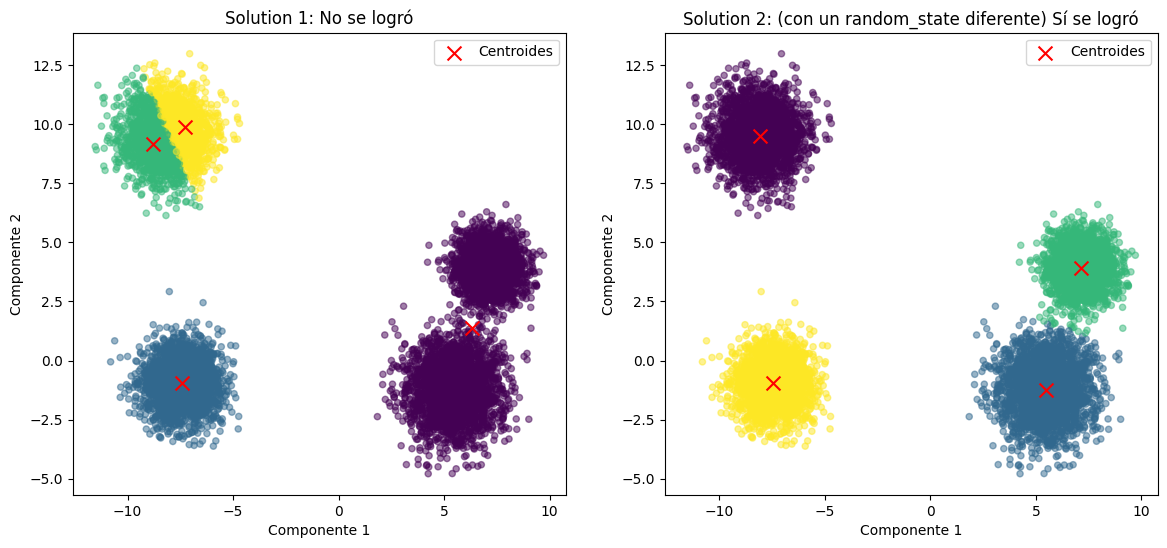

In [ ]:
def plot_clusterer_comparison(model1, model2, X, title1, title2):
    """Función para comparar dos modelos K-means con diferentes inicializaciones."""

    # Crear la figura con dos subgráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Modelo 1: Ajustar y graficar la primera solución
    model1.fit(X)
    axes[0].scatter(X[:, 0], X[:, 1], c=model1.labels_, cmap='viridis', s=20, alpha=0.5)
    axes[0].scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
                    c='red', marker='x', s=100, label='Centroides')
    axes[0].set_title(title1)

    # Modelo 2: Ajustar y graficar la segunda solución
    model2.fit(X)
    axes[1].scatter(X[:, 0], X[:, 1], c=model2.labels_, cmap='viridis', s=20, alpha=0.5)
    axes[1].scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1],
                    c='red', marker='x', s=100, label='Centroides')
    axes[1].set_title(title2)

    # Añadir leyenda
    for ax in axes:
        ax.legend()
        ax.set_xlabel("Componente 1")
        ax.set_ylabel("Componente 2")

    # Ajustar la distribución de los subgráficos


# Crear dos modelos K-means con diferentes estados aleatorios
kmeans_rnd_init1 = KMeans(n_clusters=K, init="random", n_init=1, algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=K, init="random", algorithm="elkan", max_iter=2000, random_state=42)
# Comparar ambas soluciones usando la función personalizada
plot_clusterer_comparison(
    kmeans_rnd_init1,
    kmeans_rnd_init2,
    X,
    "Solution 1: No se logró",
    "Solution 2: (con un random_state diferente) Sí se logró"
)

# Mostrar la gráfica comparativa
plt.show()


# Extra

1. Método del Codo (Elbow Method)
Este método evalúa la inercia (suma de distancias cuadradas de cada punto a su centroide más cercano) para diferentes valores de K. El punto donde la disminución de la inercia se vuelve menos pronunciada indica un buen número de clusters

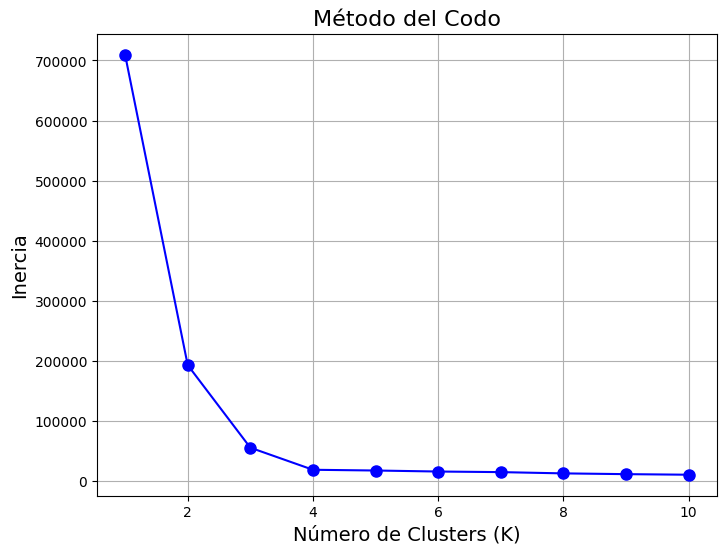

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ==============================
# VARIABLES CONFIGURABLES
# ==============================
K_MAX = 10  # Máximo número de clusters a probar

# ==============================
# CÁLCULO DE INERCIA PARA DIFERENTES K
# ==============================
inertias = []  # Lista para almacenar las inercias

for k in range(1, K_MAX + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Ajustamos el modelo
    inertias.append(kmeans.inertia_)  # Guardamos la inercia para este K

# ==============================
# VISUALIZACIÓN DEL MÉTODO DEL CODO
# ==============================
plt.figure(figsize=(8, 6))
plt.plot(range(1, K_MAX + 1), inertias, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (K)', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
plt.title('Método del Codo', fontsize=16)
plt.grid(True)
plt.show()


2. Método Silhouette (Silhouette Score)
Este método mide qué tan bien se agrupan los puntos en un cluster comparado con su distancia a otros clusters. El puntaje oscila entre -1 y 1, donde valores más cercanos a 1 indican una mejor agrupación.

Código del Método Silhouette:

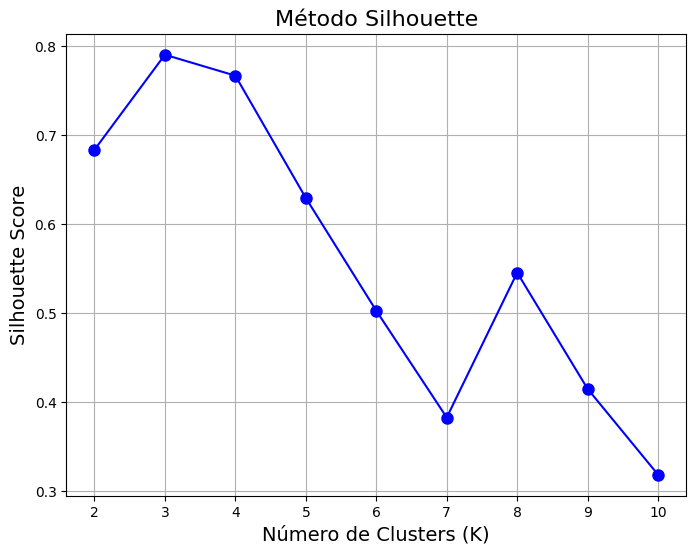

In [ ]:
from sklearn.metrics import silhouette_score

# ==============================
# VARIABLES CONFIGURABLES
# ==============================
K_MAX = 10  # Máximo número de clusters a probar

# ==============================
# CÁLCULO DE SILHOUETTE SCORE PARA DIFERENTES K
# ==============================
silhouette_scores = []  # Lista para almacenar los puntajes

for k in range(2, K_MAX + 1):  # El silhouette_score no se define para K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Ajustamos el modelo
    score = silhouette_score(X, kmeans.labels_)  # Calculamos el puntaje
    silhouette_scores.append(score)

# ==============================
# VISUALIZACIÓN DEL MÉTODO SILHOUETTE
# ==============================
plt.figure(figsize=(8, 6))
plt.plot(range(2, K_MAX + 1), silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (K)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Método Silhouette', fontsize=16)
plt.grid(True)
plt.show()


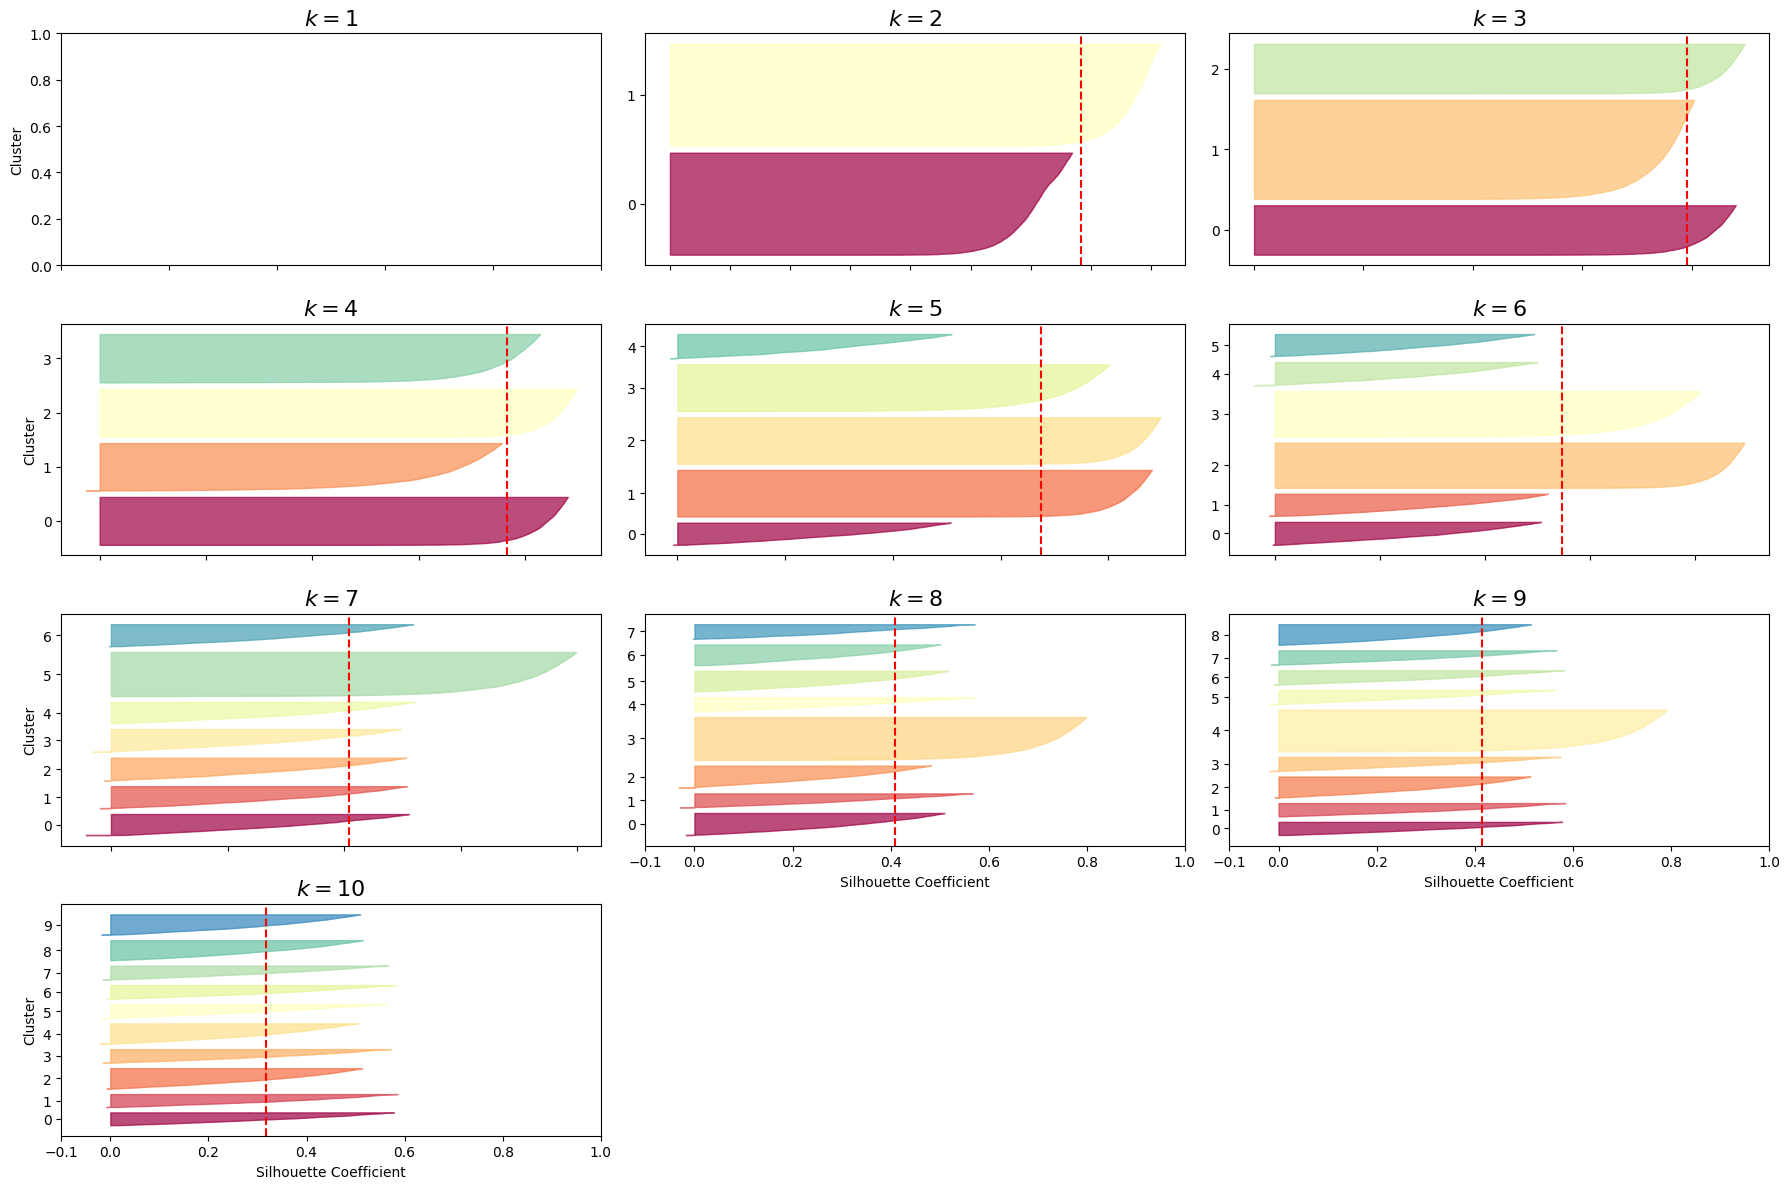

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

# Definir el rango de k desde 1 hasta 10
k_values = range(1, 11)

# Crear listas para almacenar los modelos y las puntuaciones de Silhouette
kmeans_per_k = []
silhouette_scores = []

# Ajustar K-means para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    kmeans_per_k.append(kmeans)

    # Calcular la puntuación de Silhouette solo si k > 1
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
    else:
        score = np.nan  # No se define el coeficiente de Silhouette para k=1
    silhouette_scores.append(score)

# Crear la figura para graficar los coeficientes de Silhouette
plt.figure(figsize=(18, 12))  # Ajustamos el tamaño para 10 subgráficos

# Iterar sobre cada valor de k para generar los subgráficos
for k in k_values:
    plt.subplot(4, 3, k)  # Distribución 4 filas x 3 columnas

    # Obtener las etiquetas y los coeficientes de Silhouette si k > 1
    if k > 1:
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        # Variables para la disposición de los clusters en la gráfica
        padding = len(X) // 30
        pos = padding
        ticks = []

        # Graficar los coeficientes de Silhouette para cada cluster
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        # Configurar las etiquetas del eje Y
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Configurar etiquetas condicionales
    if k in (1, 4, 7, 10):
        plt.ylabel("Cluster")

    if k in (8, 9, 10):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Dibujar línea vertical para la media de Silhouette si k > 1
    if k > 1:
        plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")

    # Título para cada subgráfico
    plt.title(f"$k={k}$", fontsize=16)

# Mostrar la gráfica completa
plt.tight_layout()
plt.show()


# Punto 2

## K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o Semi-supervised Learning) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados.

In [ ]:
#Librerias
#Libreria para leer y escribir datos en varios formatos
import scipy.io
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
# Manipulación y análisis de datos
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Obtenemos los datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Lab 5/Dataset MNIST/typedCSV.csv', delimiter=',')
df

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,255,255,255,255,255,255,255,255,253,...,250,255,255,251,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,254,255,255,255,249,253,255,255,255,255
2,0,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,253,255,253,251,255,254,255,255,...,255,255,253,253,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62987,61,255,252,254,255,253,255,255,253,255,...,246,255,252,255,252,255,255,255,255,255
62988,61,255,254,254,254,253,255,252,254,255,...,252,255,254,250,255,255,255,255,255,255
62989,61,255,252,255,255,254,255,254,255,254,...,252,255,254,250,255,255,255,255,255,255
62990,61,252,254,255,255,255,254,255,248,255,...,245,255,251,255,253,255,255,255,255,255


In [ ]:
from sklearn.utils import shuffle
# Mezclar el conjunto de datos
data = shuffle(df, random_state=42)

In [ ]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 50393
El 20% de ejemplos que seran para el entrenamiento son: 12599


Nomralización de los datos de entrenamiento y prueba

In [ ]:
import numpy as np

# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

Encontraremos las imagenes mas representativas

### **APRENDIZAJE SEMISUPERVISADO**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 500
batch_size = 7199 # Puedes ajustar el tamaño del lote según la memoria disponible
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)

# Aplica MiniBatchKMeans
X_imagenes_dist = minibatch_kmeans.fit_transform(X_train)
X_imagenes_dist

array([[2295.12746354, 2627.69196069, 2174.61782327, ..., 3342.31350327,
        2653.888068  , 2623.81697355],
       [2692.17691742, 2355.86419079, 2657.26965316, ..., 3479.16585737,
        2442.23249933, 2604.76288815],
       [2267.89548791, 1555.73299983, 2638.95929313, ..., 3328.1529386 ,
        2226.63588589, 1614.15761668],
       ...,
       [2384.20767799, 2321.03291062, 2245.78653605, ..., 3446.3941833 ,
        2399.1831772 , 1694.52362338],
       [2533.48388168, 1483.24876799, 2750.0244995 , ..., 3334.21922225,
        2347.31300952, 2157.95653819],
       [2654.15894107, 1695.41406728, 2905.70312402, ..., 3284.10343966,
        2543.21902504, 2164.75712802]])

In [ ]:
idxs = np.argmin(X_imagenes_dist, axis=0)
X_representative_images = X_train.values[idxs]

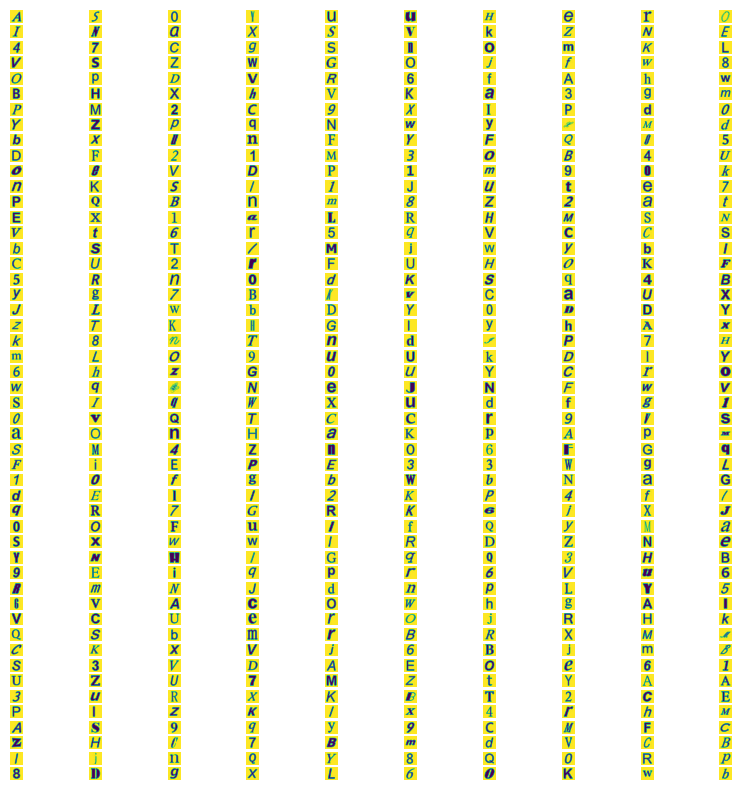

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Ajustamos el tamaño de la figura para que se vean mejor las imágenes
for index, X_representative_image in enumerate(X_representative_images):
    plt.subplot(50, 10, index+1)  # Crear una cuadrícula de 5 filas y 10 columnas para las imágenes
    plt.imshow(X_representative_image.reshape(28,28))  # Reajustar las imágenes a su forma original de 150x150x3 (RGB)
    plt.axis('off')  # Ocultar los ejes
plt.show()

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).

In [ ]:


y_representative_images = y_train.values[idxs]

Y entrenaremos un clasificados usando estas imágenes representativas.

In [ ]:
from sklearn.linear_model import LogisticRegression



log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=25)
%time log_reg2.fit(X_representative_images, y_representative_images)
log_reg2.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 2.47 s, sys: 940 ms, total: 3.41 s
Wall time: 1.78 s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6233034367806969



## Prueba con imágenes aleatorias
Entrenar el mismo modelo con 50 imágenes aleatorias nos daría peores resultados.

In [ ]:
# Aque con valores aleatorios

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:500], y_train[:500])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 2.55 s, sys: 1.68 s, total: 4.24 s
Wall time: 3.08 s


0.5836971188189539

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [ ]:
from sklearn.cluster import KMeans
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[minibatch_kmeans.labels_==i] = y_representative_images[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 4.87 s, sys: 2.19 s, total: 7.06 s
Wall time: 5.33 s


0.5650448448289547

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

## **APRENDIZAJE ACTIVO**

El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [ ]:
#Utiliza el clasificador log_reg3 para predecir las probabilidades de pertenencia
# a cada clase para las primeras 1000 muestras del set de training
probas = log_reg3.predict_proba(X_train[:1000])

# Encuentra el índice de la clase con la probabilidad más alta para cada muestra en el conjunto de entrenamiento.
labels_ixs = np.argmax(probas, axis=1)
# Crea un arreglo labels que contiene las probabilidades correspondientes a la clase más probable para cada muestra.
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
 #  Calcula los índices que ordenarían las probabilidades en orden ascendente.
sorted_ixs = np.argsort(labels)
 # Selecciona las probabilidades de las 10 muestras con menor confianza (mayor incertidumbre) según el modelo.
labels[sorted_ixs[:10]]

array([0.99838608, 0.99946477, 0.99956455, 0.99957558, 0.99960648,
       0.99960745, 0.99964115, 0.9996476 , 0.99967301, 0.99967741])

El siguiente bloque de código se encarga de visualizar las imágenes correspondientes a las muestras con mayor incertidumbre (mayor confusión o menor confianza en las predicciones) según el modelo de clasificación

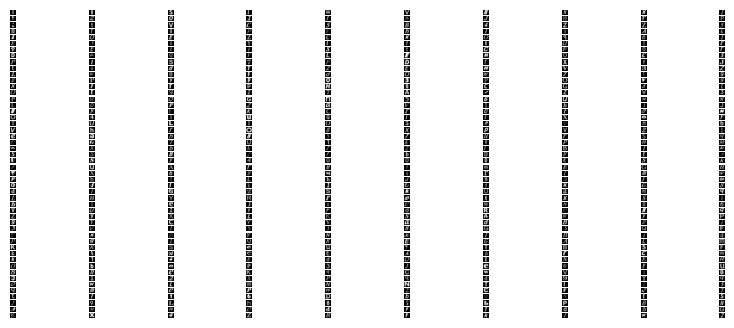

In [ ]:
# Extrae las características (imágenes) correspondientes a las k muestras con mayor incertidumbre
X_lowest = X_train.values[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [ ]:
# Extracción de las Etiquetas de las Muestras con Mayor Incertidumbre
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([47, 44, 54, 19, 58, 31, 56, 59, 59, 47, 60, 61, 50,  1, 18,  8, 19,
       11, 53, 51, 44, 55, 31, 12,  5, 11,  4, 61, 61,  5, 49, 29,  1, 25,
       31, 43,  1, 44, 10, 43, 18, 24, 14, 61, 38, 33, 24, 52,  6,  1, 14,
        3, 45, 60, 18,  1, 55, 30, 47, 53, 31, 55, 47, 44, 54, 55, 38, 15,
        0, 53, 13, 36, 26, 31, 21, 40, 11, 50, 38,  3, 25, 47, 28,  7, 15,
       13, 53, 59, 41, 19, 55, 44, 39, 29, 61, 14, 49, 31,  3, 61, 21, 32,
       11, 15, 39, 24, 32,  7, 41,  9, 13, 25, 60, 51, 50,  3, 51, 24, 31,
       42, 33,  9, 53, 51, 17, 42, 12, 16,  5, 47, 24, 53, 42, 18,  7, 10,
       40, 61, 57,  3, 25, 27, 24, 16, 49,  5,  6, 56, 22, 17, 21, 26, 15,
       35, 36, 31,  1, 46, 45, 19, 30, 60, 18, 20, 12, 53,  0, 55, 24, 22,
       24,  4, 18, 56, 26, 18, 18, 59,  6, 60, 29, 56, 21, 18, 24,  5,  9,
       26, 43, 37, 31, 43, 53, 50,  8, 33, 51, 31, 35, 18, 40, 19, 43,  8,
        5,  1, 56, 29, 28, 52,  0, 16,  7, 30,  1, 20, 26, 51, 43, 22, 48,
       33, 37, 10,  1, 35


El siguiente código realiza una actualización de las etiquetas en un conjunto de etiquetas propagadas (y_train_propagated) utilizando las etiquetas correspondientes a las muestras con mayor incertidumbre (y_lowest). A continuación, explicaré qué hace este código:

In [ ]:
# Actualización de las Etiquetas de las Muestras con Mayor Incertidumbre
y_train2 = y_train_propagated[:1000].copy()
# y_train2: Es un arreglo de etiquetas actualizado, donde las etiquetas de las k muestras
# con mayor incertidumbre en y_train_propagated han sido reemplazadas por las etiquetas correspondientes de y_lowest.

y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 7.05 s, sys: 3.83 s, total: 10.9 s
Wall time: 8.16 s


0.6061592189856337

El código que actualiza las etiquetas en función de las muestras con mayor incertidumbre proporciona una manera eficaz de mejorar progresivamente el conjunto de etiquetas utilizado en el entrenamiento del modelo durante el aprendizaje activo, facilitando así la mejora iterativa del modelo de clasificación.

El siguiente código crea un nuevo clasificador de regresión logística (log_reg5) y lo entrena utilizando las etiquetas actualizadas (y_train2) en un subconjunto de muestras del conjunto de entrenamiento. Luego evalúa el desempeño de este clasificador en el conjunto de prueba (X_test, y_test)

In [ ]:
# Mostramos las etiquetas de las muestras con mayor incertidumbre
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg5.fit(X_train_[:1000], y_train2)

# Calculamos la precisión del clasificador log_reg5 en el conjunto de prueba.
log_reg5.score(X_test_, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 3.82 s, sys: 1.66 s, total: 5.48 s
Wall time: 6.75 s


0.6313199460274624

El código que crea, entrena y evalúa el clasificador de regresión logística log_reg5 utilizando etiquetas actualizadas a través del aprendizaje activo permite mejorar y validar la efectividad del modelo en la tarea de clasificación. La precisión obtenida en el conjunto de prueba sirve como métrica de rendimiento para evaluar la calidad del modelo entrenado.

# Punto 3


### DBSCAN
